In [1]:
from keras.applications import VGG16

Using TensorFlow backend.


In [2]:
nn = VGG16()

In [3]:
nn.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

138 million trainable parameters 

https://stackoverflow.com/questions/43720817/how-many-epochs-does-it-take-to-train-vgg-16

In [7]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt

In [6]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

/Users/jeffreyherman/opt/anaconda3/lib/python3.7/site-packages/matplotlib/text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


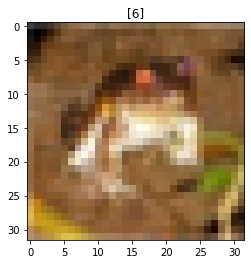

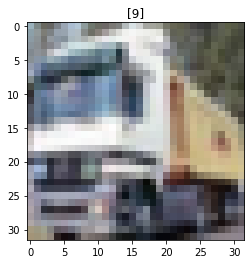

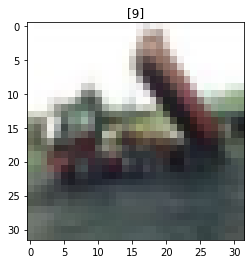

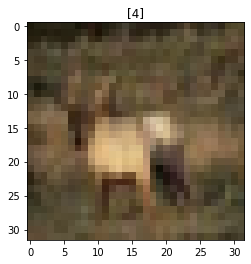

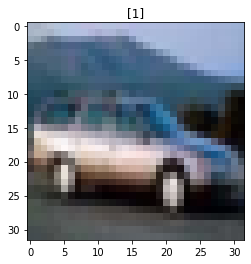

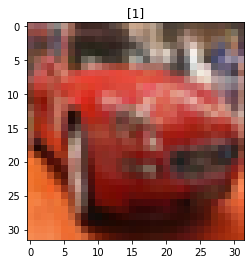

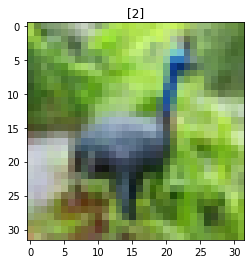

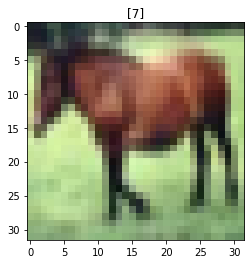

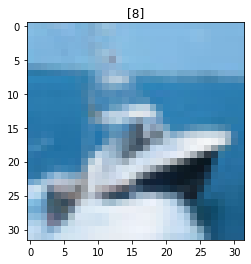

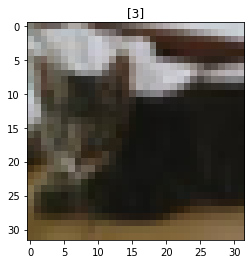

In [11]:
for i in range(10):
    plt.imshow(train_images[i])
    plt.title(train_labels[i])
    plt.show()

### Baseline CNN 

In [14]:
from keras import models 
from keras import layers 

In [15]:
train_images.shape

(50000, 32, 32, 3)

In [22]:
nn = models.Sequential()

nn.add(layers.Conv2D(32, (3, 3), input_shape = (32, 32, 3), activation = 'relu'))
nn.add(layers.MaxPooling2D(2, 2))

nn.add(layers.Conv2D(32, (3, 3), activation = 'relu'))
nn.add(layers.MaxPooling2D(2, 2))

nn.add(layers.Flatten())

nn.add(layers.Dense(10, activation='softmax'))

In [23]:
from keras.utils import to_categorical
train_labels_cat = to_categorical(train_labels)
test_labels_cat = to_categorical(test_labels)

In [24]:
nn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [25]:
nn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                11530     
Total params: 21,674
Trainable params: 21,674
Non-trainable params: 0
__________________________________________________

In [26]:
train_images.shape, test_images.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [27]:
train_images = train_images.reshape((train_images.shape[0], 32, 32, 3))
test_images = test_images.reshape((test_images.shape[0], 32, 32, 3))

In [28]:
import time

In [29]:
t0 = time.time()
nn_results = nn.fit(train_images, train_labels_cat, epochs = 10, validation_split=0.2)
t1 = time.time()

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 18s 458us/step - loss: 2.2693 - accuracy: 0.2475 - val_loss: 1.7644 - val_accuracy: 0.3516
Epoch 2/10
40000/40000 [==============================] - 18s 450us/step - loss: 1.6751 - accuracy: 0.3914 - val_loss: 1.6434 - val_accuracy: 0.4070
Epoch 3/10
40000/40000 [==============================] - 18s 442us/step - loss: 1.5101 - accuracy: 0.4575 - val_loss: 1.4731 - val_accuracy: 0.4670
Epoch 4/10
40000/40000 [==============================] - 18s 445us/step - loss: 1.3953 - accuracy: 0.5050 - val_loss: 1.4150 - val_accuracy: 0.4978
Epoch 5/10
40000/40000 [==============================] - 18s 459us/step - loss: 1.3246 - accuracy: 0.5318 - val_loss: 1.4275 - val_accuracy: 0.4999
Epoch 6/10
40000/40000 [==============================] - 19s 470us/step - loss: 1.2715 - accuracy: 0.5555 - val_loss: 1.3087 - val_accuracy: 0.5495
Epoch 7/10
40000/40000 [==============================] 

In [30]:
t1 - t0

181.38719701766968

In [31]:
nn.evaluate(test_images, test_labels_cat)

10000/10000 [==============================] - 1s 117us/step


[1.301913452911377, 0.5503000020980835]

## Feature Extraction 

In [32]:
nn_vgg = VGG16(weights = 'imagenet', include_top = False, input_shape = (32, 32, 3))

In [33]:
nn_vgg.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0     

Notice the input shape changes and the trainable parameters changed 

In [34]:
model_pt = models.Sequential()
model_pt.add(nn_vgg)
model_pt.add(layers.Flatten())
model_pt.add(layers.Dense(64, activation='relu'))
model_pt.add(layers.Dense(10, activation='sigmoid'))

In [35]:
model_pt.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten_3 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                32832     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                650       
Total params: 14,748,170
Trainable params: 14,748,170
Non-trainable params: 0
_________________________________________________________________


In [36]:
nn_vgg.trainable = False

In [37]:
model_pt.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten_3 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                32832     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                650       
Total params: 14,748,170
Trainable params: 33,482
Non-trainable params: 14,714,688
_________________________________________________________________


In [38]:
model_pt.compile(loss='binary_crossentropy',
              optimizer="sgd",
              metrics=['acc'])

In [39]:
model_pt.fit(train_images, train_labels_cat, epochs = 5)

Epoch 1/5
50000/50000 [==============================] - 179s 4ms/step - loss: 0.3830 - acc: 0.8908
Epoch 2/5
50000/50000 [==============================] - 179s 4ms/step - loss: 0.2480 - acc: 0.9094
Epoch 3/5
50000/50000 [==============================] - 193s 4ms/step - loss: 0.2312 - acc: 0.9135
Epoch 4/5
50000/50000 [==============================] - 189s 4ms/step - loss: 0.2220 - acc: 0.9166
Epoch 5/5
50000/50000 [==============================] - 172s 3ms/step - loss: 0.2156 - acc: 0.9183


In [40]:
model_pt.evaluate(test_images, test_labels_cat)

10000/10000 [==============================] - 34s 3ms/step


[0.21913132696151733, 0.9180899262428284]

## Fine Tuning

In [41]:
nn_vgg.trainable = False

In [42]:
model_pt.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten_3 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                32832     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                650       
Total params: 14,748,170
Trainable params: 33,482
Non-trainable params: 14,714,688
_________________________________________________________________


In [43]:
for layer in nn_vgg.layers:
    print(layer.name)

input_2
block1_conv1
block1_conv2
block1_pool
block2_conv1
block2_conv2
block2_pool
block3_conv1
block3_conv2
block3_conv3
block3_pool
block4_conv1
block4_conv2
block4_conv3
block4_pool
block5_conv1
block5_conv2
block5_conv3
block5_pool


In [54]:
nn_vgg.trainable = True
set_trainable = False
for layer in nn_vgg.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [55]:
for layer in nn_vgg.layers:
    print(layer.name, layer.trainable)

input_2 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True


In [56]:
for layer in model_pt.layers:
    print(layer.name, layer.trainable)

vgg16 True
flatten_3 True
dense_3 True
dense_4 True


In [57]:
model_pt.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten_3 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                32832     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                650       
Total params: 7,668,746
Trainable params: 33,482
Non-trainable params: 7,635,264
_________________________________________________________________


/Users/jeffreyherman/opt/anaconda3/lib/python3.7/site-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


In [58]:
model_pt.compile(loss='binary_crossentropy',
              optimizer="sgd",
              metrics=['acc'])

In [59]:
model_pt.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten_3 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                32832     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                650       
Total params: 14,748,170
Trainable params: 7,112,906
Non-trainable params: 7,635,264
_________________________________________________________________


In [60]:
model_pt.fit(train_images, train_labels_cat, epochs = 5)

Epoch 1/5
50000/50000 [==============================] - 699s 14ms/step - loss: 0.1746 - acc: 0.9334
Epoch 2/5
50000/50000 [==============================] - 650s 13ms/step - loss: 0.1356 - acc: 0.9480
Epoch 3/5
12448/50000 [======>.......................] - ETA: 7:55 - loss: 0.1194 - acc: 0.9536

KeyboardInterrupt: 